# Country Data Analysis

## 1. Load the Dataset

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("Country-data.xls")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [27]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Conclusion:** one column is not exploitable -> country (not numerical)

### Missing Values

In [29]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Conclusion:** no missing values.

### Check For Duplicated Values

In [30]:
df.duplicated().sum()


np.int64(0)

**Conclusion:** no duplicated values.

## 2. Introduction

We have now loaded a dataset about country metrics.

Here are the descriptions about some columns:
* **child_mort:** child death before 5 years old.
* **health:** spent capital on health.
* **total_fer:** fertility.
* **gdpp:** gdp per capita.

## 3. EDA

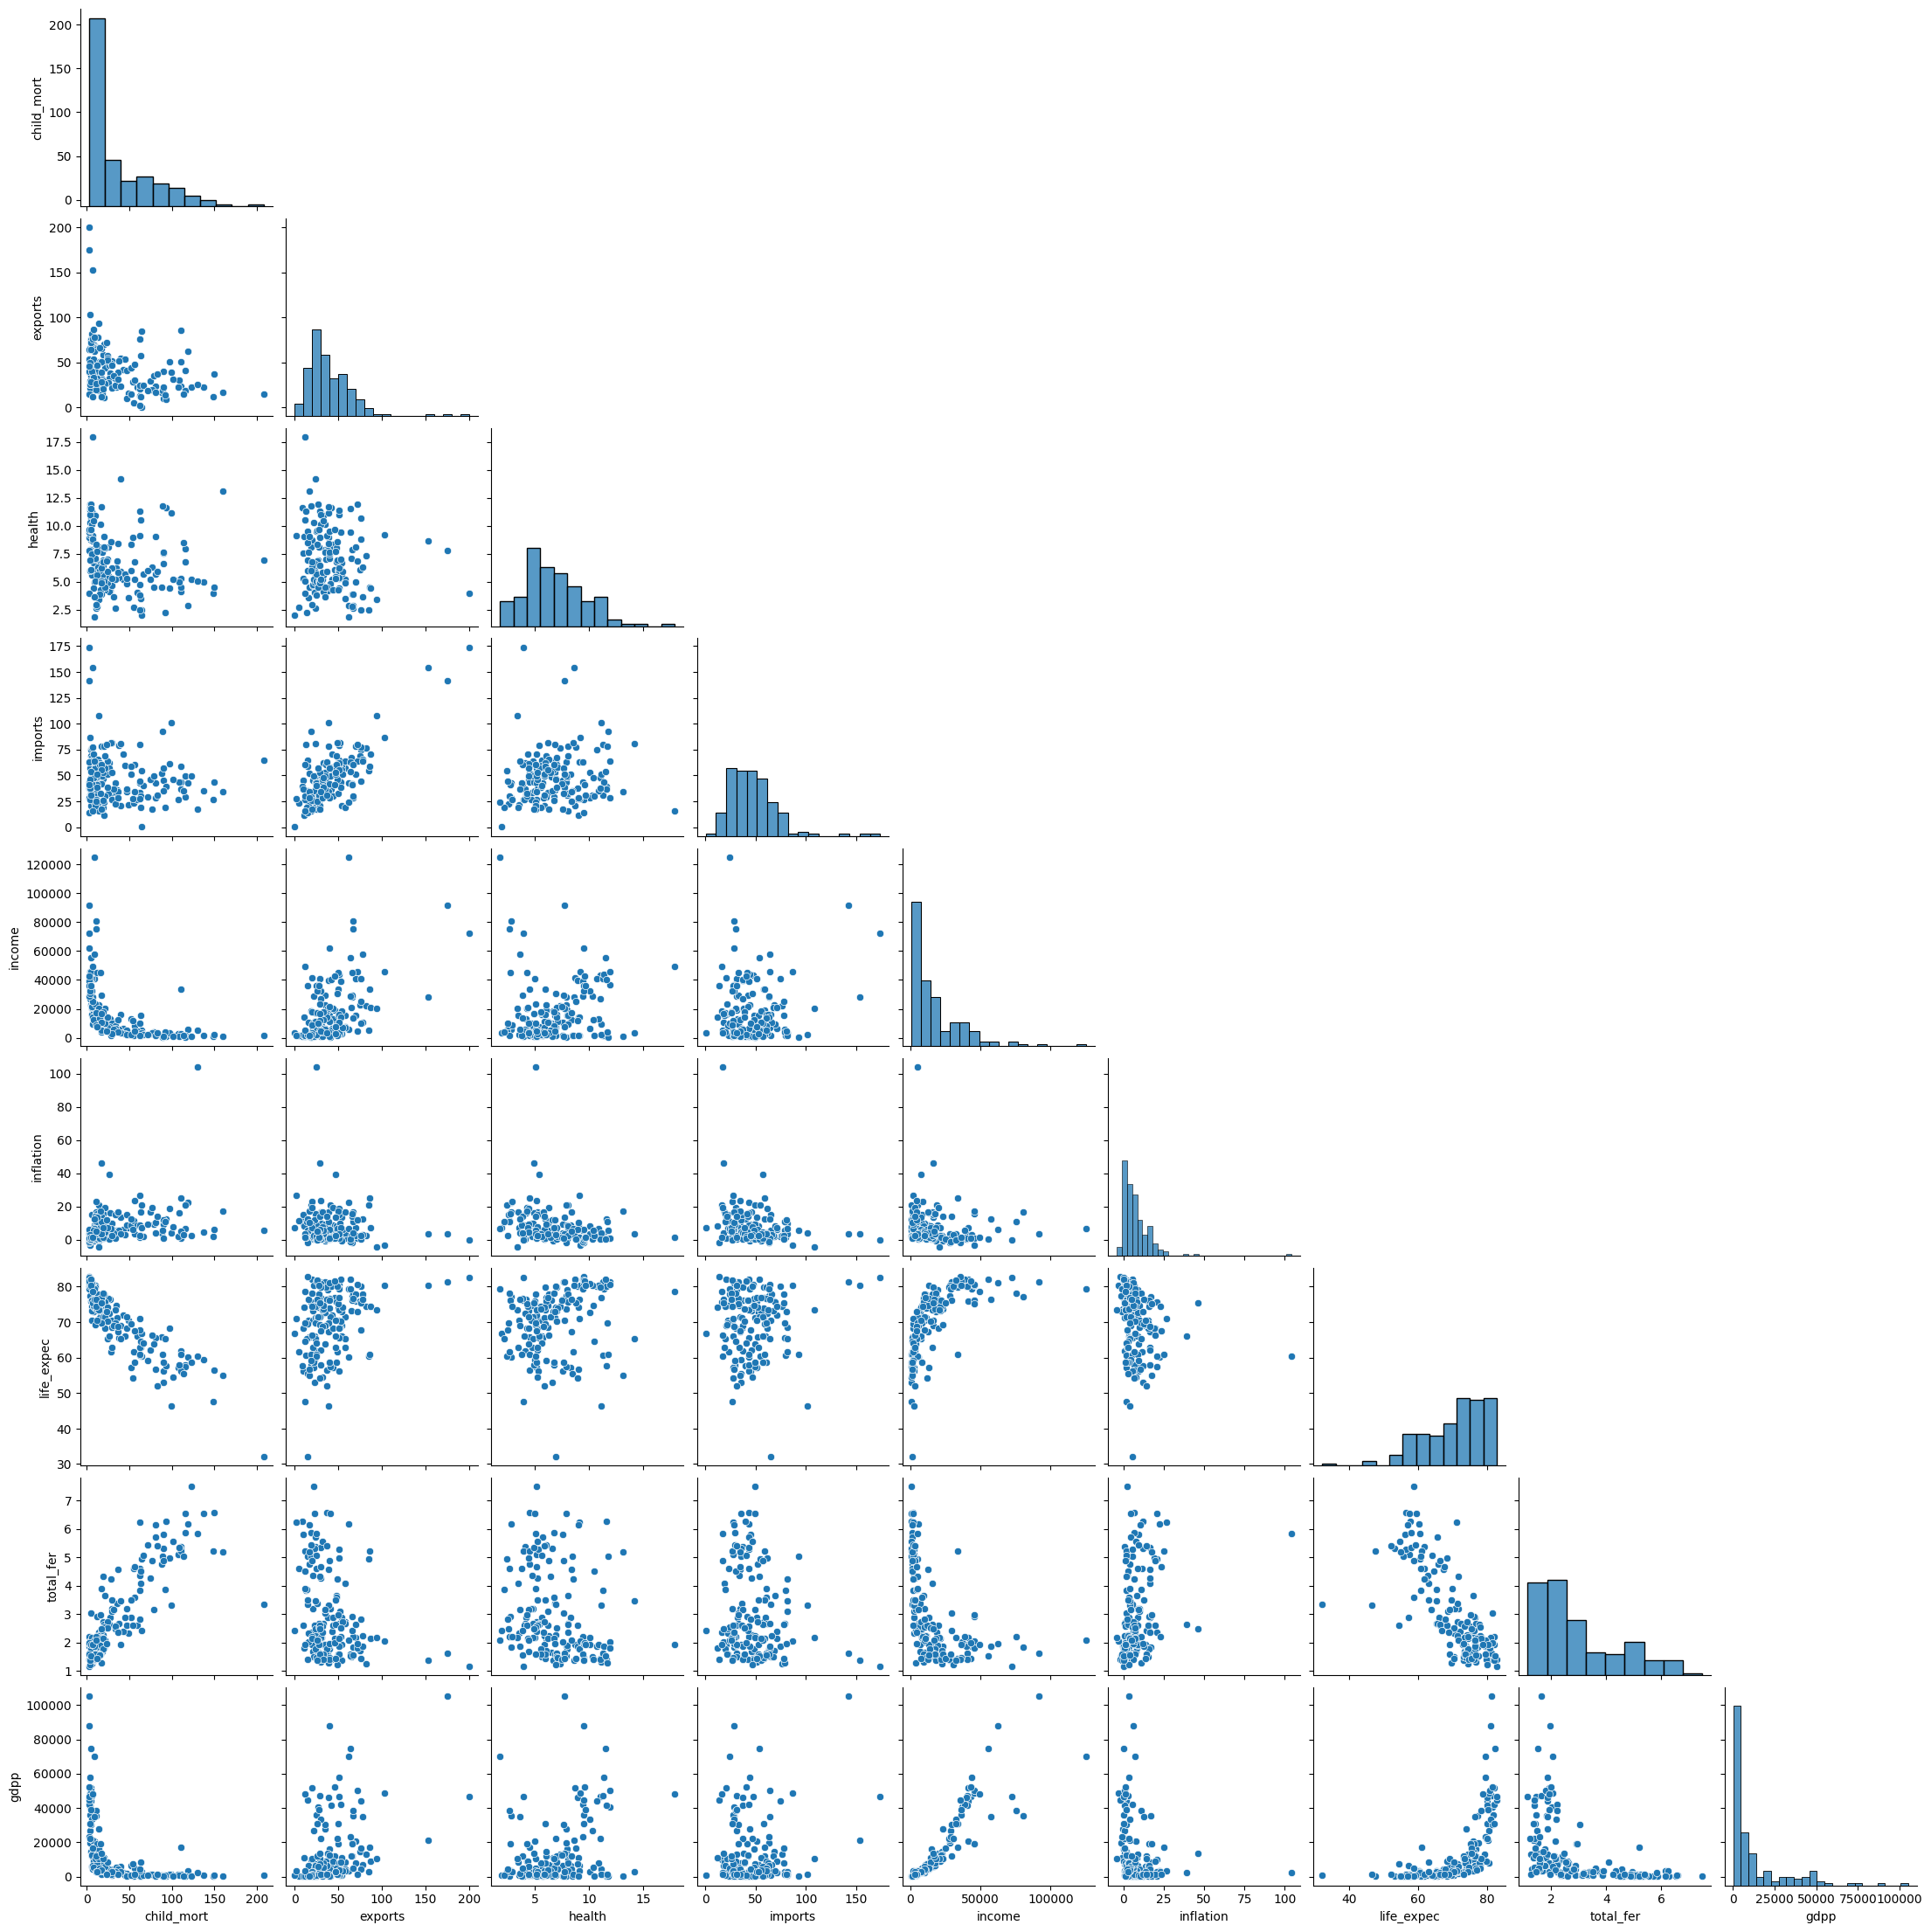

In [31]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

e = sns.pairplot(df)
e.map_upper(hide_current_axis)

**Conclusion:**
* **gdpp/child_mort:** grow apart.
* **gdpp/income:** grow together.
* **gdpp/total_fer:** grow apart.
* **total_fer/child_mort:** grow together.
* **total_fer/income:** grow apart.
* **life_expec/child_mort:** high life_expec means low child_mort and vice versa.
* **life_expec/income:** high income likely means high life_expec.
* **income/child_mort:** grow apart.
* **imports/exports:** grow together.

In [32]:
corr_matrix = df.drop('country', axis=1).corr()
corr_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

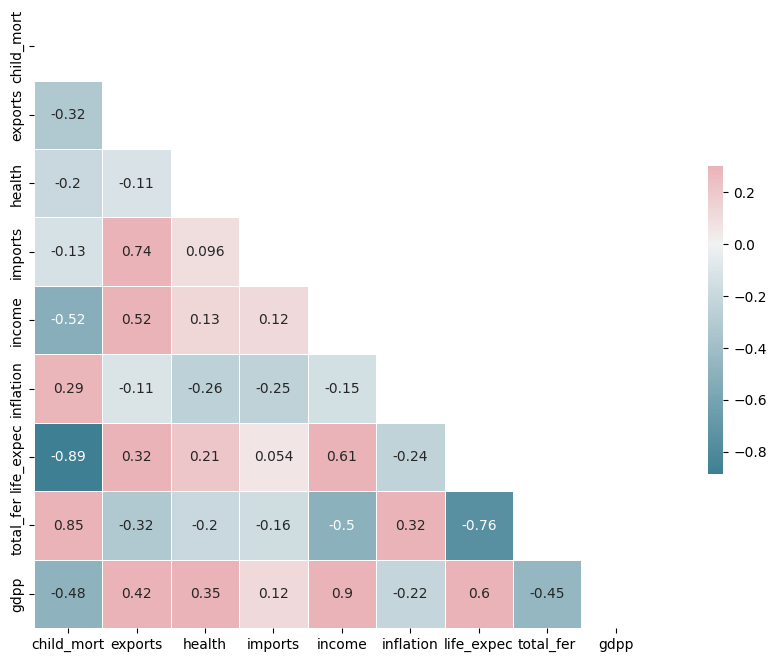

In [33]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)


**Conclusion:**
* [confirmed] **gdpp/child_mort:** grow apart.
* [discovered] **gdpp/export:** grow together moderately.
* [discovered] **gdpp/health:** grow together moderately.
* [confirmed] **gdpp/income:** grow together.
* [discovered] **gdpp/life_expec:** grow together moderately.
* [confirmed] **gdpp/total_fer:** grow apart.
* [confirmed] **total_fer/child_mort:** grow together.
* [confirmed] **total_fer/income:** grow apart.
* [discovered] **total_fer/life_expec:** grow apart.
* [confirmed] **life_expec/child_mort:** high life_expec means low child_mort and vice versa.
* [confirmed] **life_expec/income:** high income likely means high life_expec.
* [confirmed] **income/child_mort:** grow apart.
* [discovered] **income/exports:** grow together.
* [confirmed] **imports/exports:** grow together.

In [34]:
dfq = df.copy()
dfq['Quantile_Group'] = pd.qcut(
    dfq['gdpp'],
    q=3,
    labels=['low', 'medium','high'],
    duplicates='drop'
)
dfq

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Quantile_Group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,low
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,medium
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,medium
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,medium
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,high
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,medium
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,high
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,low
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,low


In [35]:
total_low = dfq[dfq['Quantile_Group'] == 'low'].shape[0]
total_medium = dfq[dfq['Quantile_Group'] == 'medium'].shape[0]
total_high = dfq[dfq['Quantile_Group'] == 'high'].shape[0]

total_low, total_medium, total_high

(56, 55, 56)

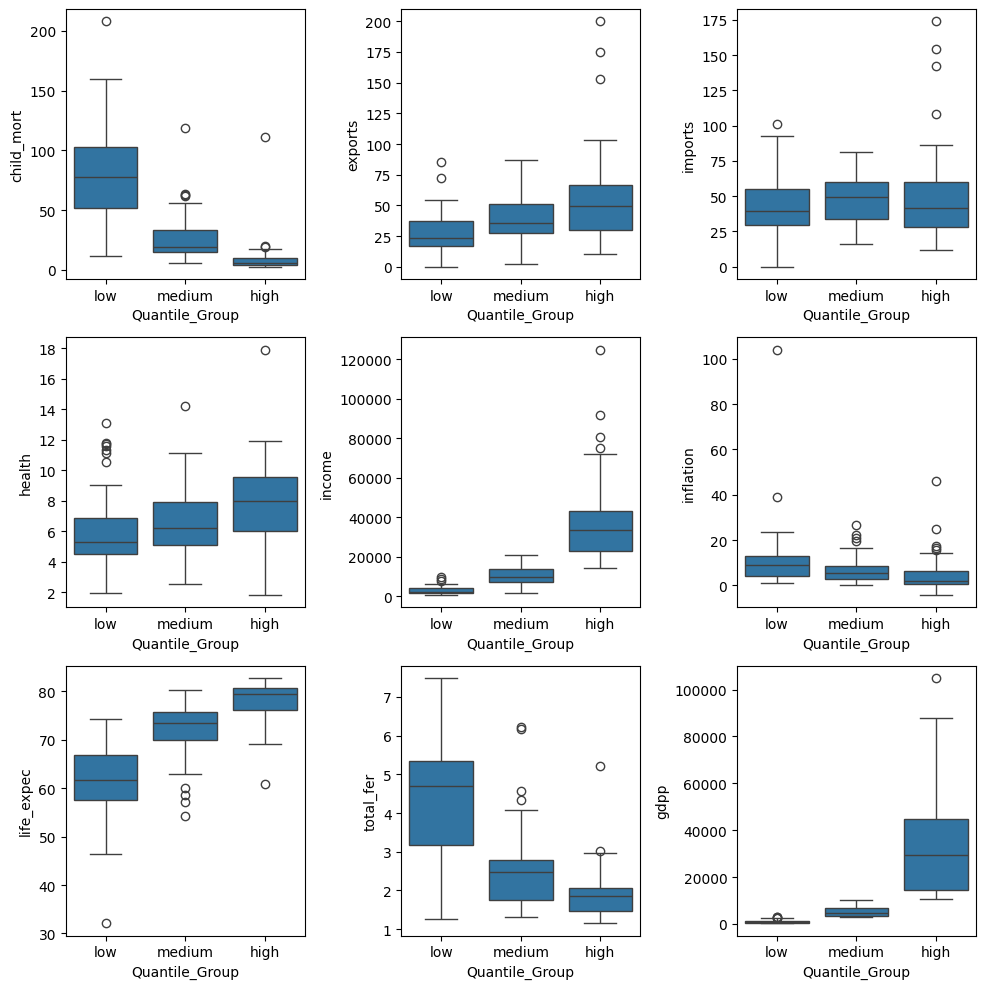

In [36]:
plt.subplots(ncols=3,nrows=3, figsize=(10, 10))

plt.subplot(3,3, 1)
sns.boxplot(y=dfq['child_mort'], x=dfq['Quantile_Group'])

plt.subplot(3,3, 2)
sns.boxplot(y=dfq['exports'], x=dfq['Quantile_Group'])

plt.subplot(3,3, 3)
sns.boxplot(y=dfq['imports'], x=dfq['Quantile_Group'])

plt.subplot(3,3, 4)
sns.boxplot(y=dfq['health'], x=dfq['Quantile_Group'])

plt.subplot(3,3, 5)
sns.boxplot(y=dfq['income'], x=dfq['Quantile_Group'])

plt.subplot(3,3, 6)
sns.boxplot(y=dfq['inflation'], x=dfq['Quantile_Group'])

plt.subplot(3,3, 7)
sns.boxplot(y=dfq['life_expec'], x=dfq['Quantile_Group'])

plt.subplot(3,3, 8)
sns.boxplot(y=dfq['total_fer'], x=dfq['Quantile_Group'])

plt.subplot(3,3, 9)
sns.boxplot(y=dfq['gdpp'], x=dfq['Quantile_Group'])

plt.tight_layout() # make sure the labels don't overlap

**Conclusion:**
* much higher child_mort for low gdpp, with a few outliers all around.
* import/export are almost similar for low/medium/high gdpp.
    * with more outliers in the low/high gdpp.
* health spending  get marginally higher with growing gdpp.
    * more outliers in the low gdpp category.
* income difference is drastically higher between low/medium against high gdpp.
    * many more outliers in the high gdpp category
* inflation generally low, with some outliers all around
    * much higher outliers for the low gdpp category
* life_expec is higher for higher gdpp category
    * less outliers for high gdpp
    * higher outliers for low gdpp
* total_fer is much higher for low gdpp, low for higher gdpp
    * some outliers for high gdpp
    * no outliers for low gdpp
* gdpp difference between low and medium against high is dramatic
    * one outlier in the high category

## 4. Feature Engineering

In [37]:
X = df.iloc[:,1:].values # exclude 'country' column
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [38]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X)
X_train


array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [39]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2)
X_pca = kpca.fit_transform(X_train)
X_pca

array([[-0.59907764,  0.09549001],
       [ 0.1584743 , -0.2120924 ],
       [ 0.00368552, -0.13586725],
       [-0.65023499,  0.27597526],
       [ 0.20071124, -0.06466223],
       [ 0.112534  , -0.20604633],
       [ 0.08748612, -0.24430696],
       [ 0.44078359,  0.01628159],
       [ 0.52052639,  0.11505267],
       [ 0.03880915, -0.12198813],
       [ 0.25330504, -0.03709248],
       [ 0.28004875,  0.08194452],
       [-0.10721304, -0.24817007],
       [ 0.23240595, -0.10625665],
       [ 0.18238383, -0.10352266],
       [ 0.49552529,  0.24168217],
       [ 0.0343959 , -0.05258709],
       [-0.57211533,  0.08891622],
       [-0.0072184 , -0.06228781],
       [-0.12086723, -0.09859734],
       [ 0.25999884, -0.22215393],
       [-0.15372061,  0.02940304],
       [ 0.13962489, -0.26315962],
       [ 0.42041602,  0.19485164],
       [ 0.20775216, -0.12550836],
       [-0.65389251,  0.11320578],
       [-0.60975439,  0.11313395],
       [-0.1091356 , -0.03051148],
       [-0.57452028,

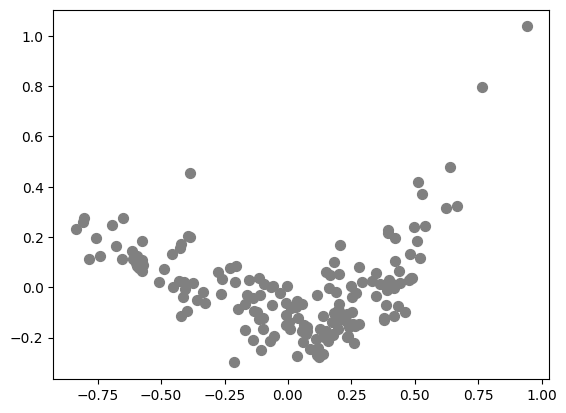

In [40]:
all_pos_x = X_pca[:, 0]
all_pos_y = X_pca[:, 1]

plt.scatter(all_pos_x, all_pos_y, s=50, c="grey")

## 5. Clustering

Text(0, 0.5, 'Within Cluster Sum of Squares (WCSS)')

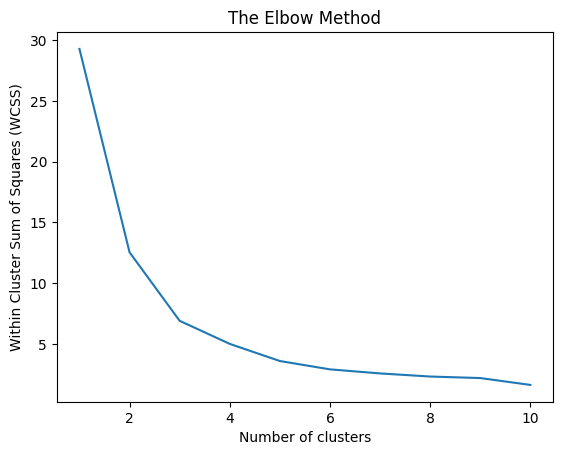

In [41]:
from sklearn.cluster import KMeans
# Using the elbow method to find the optimal number of clusters
wcss = []  # Within Cluster Sum of Squares -> WCSS
for i in range(1, 11):

    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

    # training phase
    kmeans.fit(X_pca)

    # save the wcss value
    wcss.append(kmeans.inertia_)

# render optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')

**Conclusion:** the graph showed us that 3 clusters are good enough -> we'll assume 3 clusters

In [42]:
best_total_clusters = 3

In [43]:
kmeans = KMeans(n_clusters=best_total_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)
y_kmeans

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

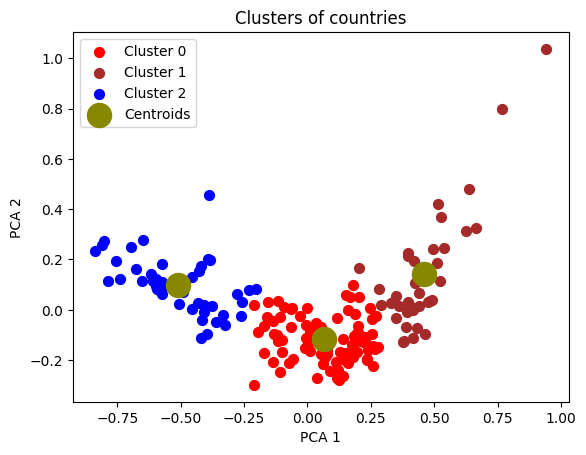

In [44]:
all_colors = ['red', 'brown', 'blue', 'green', 'cyan', 'magenta']

# render clusters
for ii in range(0, best_total_clusters):

    curr_color = all_colors[ii % len(all_colors)]

    all_pos_x = X_pca[y_kmeans == ii, 0]
    all_pos_y = X_pca[y_kmeans == ii, 1]

    plt.scatter(all_pos_x, all_pos_y, s=50,
                c=curr_color, label=f'Cluster {ii}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=300, c='#888800', label='Centroids')

plt.title('Clusters of countries')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

In [45]:
df_final = df.copy()
df_final['Clusters'] = y_kmeans
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


### Quantile group classification (inaccurate)

In [46]:
total_low = dfq[dfq['Quantile_Group'] == 'low'].shape[0]
total_medium = dfq[dfq['Quantile_Group'] == 'medium'].shape[0]
total_high = dfq[dfq['Quantile_Group'] == 'high'].shape[0]

print(f"total_low    {total_low}")
print(f"total_medium {total_medium}")
print(f"total_high   {total_high}")

total_low    56
total_medium 55
total_high   56


### Clustering classification (accurate)

In [47]:
total_low = df_final[df_final['Clusters'] == 2].shape[0]
total_medium = df_final[df_final['Clusters'] == 0].shape[0]
total_high = df_final[df_final['Clusters'] == 1].shape[0]

print(f"total_low    {total_low}")
print(f"total_medium {total_medium}")
print(f"total_high   {total_high}")

total_low    45
total_medium 84
total_high   38


### Low gdpp Cluster Countries

In [48]:
df_final[df_final['Clusters'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2


### Medium gdpp Cluster Countries

#### part 1

In [49]:
df_final[df_final['Clusters'] == 0].iloc[0:50,:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,0
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,0


#### part 2

In [50]:
df_final[df_final['Clusters'] == 0].iloc[50:100,:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
101,"Micronesia, Fed. Sts.",40.0,23.500,14.20,81.0000,3340,3.800,65.4,3.46,2860,0
102,Moldova,17.2,39.200,11.70,78.5000,3910,11.100,69.7,1.27,1630,0
103,Mongolia,26.1,46.700,5.44,56.7000,7710,39.200,66.2,2.64,2650,0
104,Montenegro,6.8,37.000,9.11,62.7000,14000,1.600,76.4,1.77,6680,0
105,Morocco,33.5,32.200,5.20,43.0000,6440,0.976,73.5,2.58,2830,0
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988,0
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.100,68.3,2.61,592,0
115,Oman,11.7,65.700,2.77,41.2000,45300,15.600,76.1,2.90,19300,0
117,Panama,19.7,70.000,8.10,78.2000,15400,2.590,77.8,2.62,8080,0
118,Paraguay,24.1,55.100,5.87,51.5000,7290,6.100,74.1,2.73,3230,0


### High gdpp Cluster Countries

In [51]:
df_final[df_final['Clusters'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14600,1


## 6. Conclusion

**The low gdpp cluster countries:**
* mostly African countries, poorly developed, at war and/or exploited countries by larger nations
    * the pattern sofar: high child mortality, low income, low GDP

**The medium gdpp cluster countries:**
* mostly South American, Asian, some east european and some middle eastern countries

**The high gdpp cluster countries:**
* mostly great or super power, ex: USA, Canada, central Europeans countries